# Batik Image Classification

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('/content/drive/MyDrive/Dataset')

batik_types = os.listdir('/content/drive/MyDrive/Dataset')
print (batik_types)

print("Types of batik found: ", len(dataset_path))

['batik-kawung', 'batik-megamendung', 'batik-parang']
Types of batik found:  3


## Exploring Batik Data

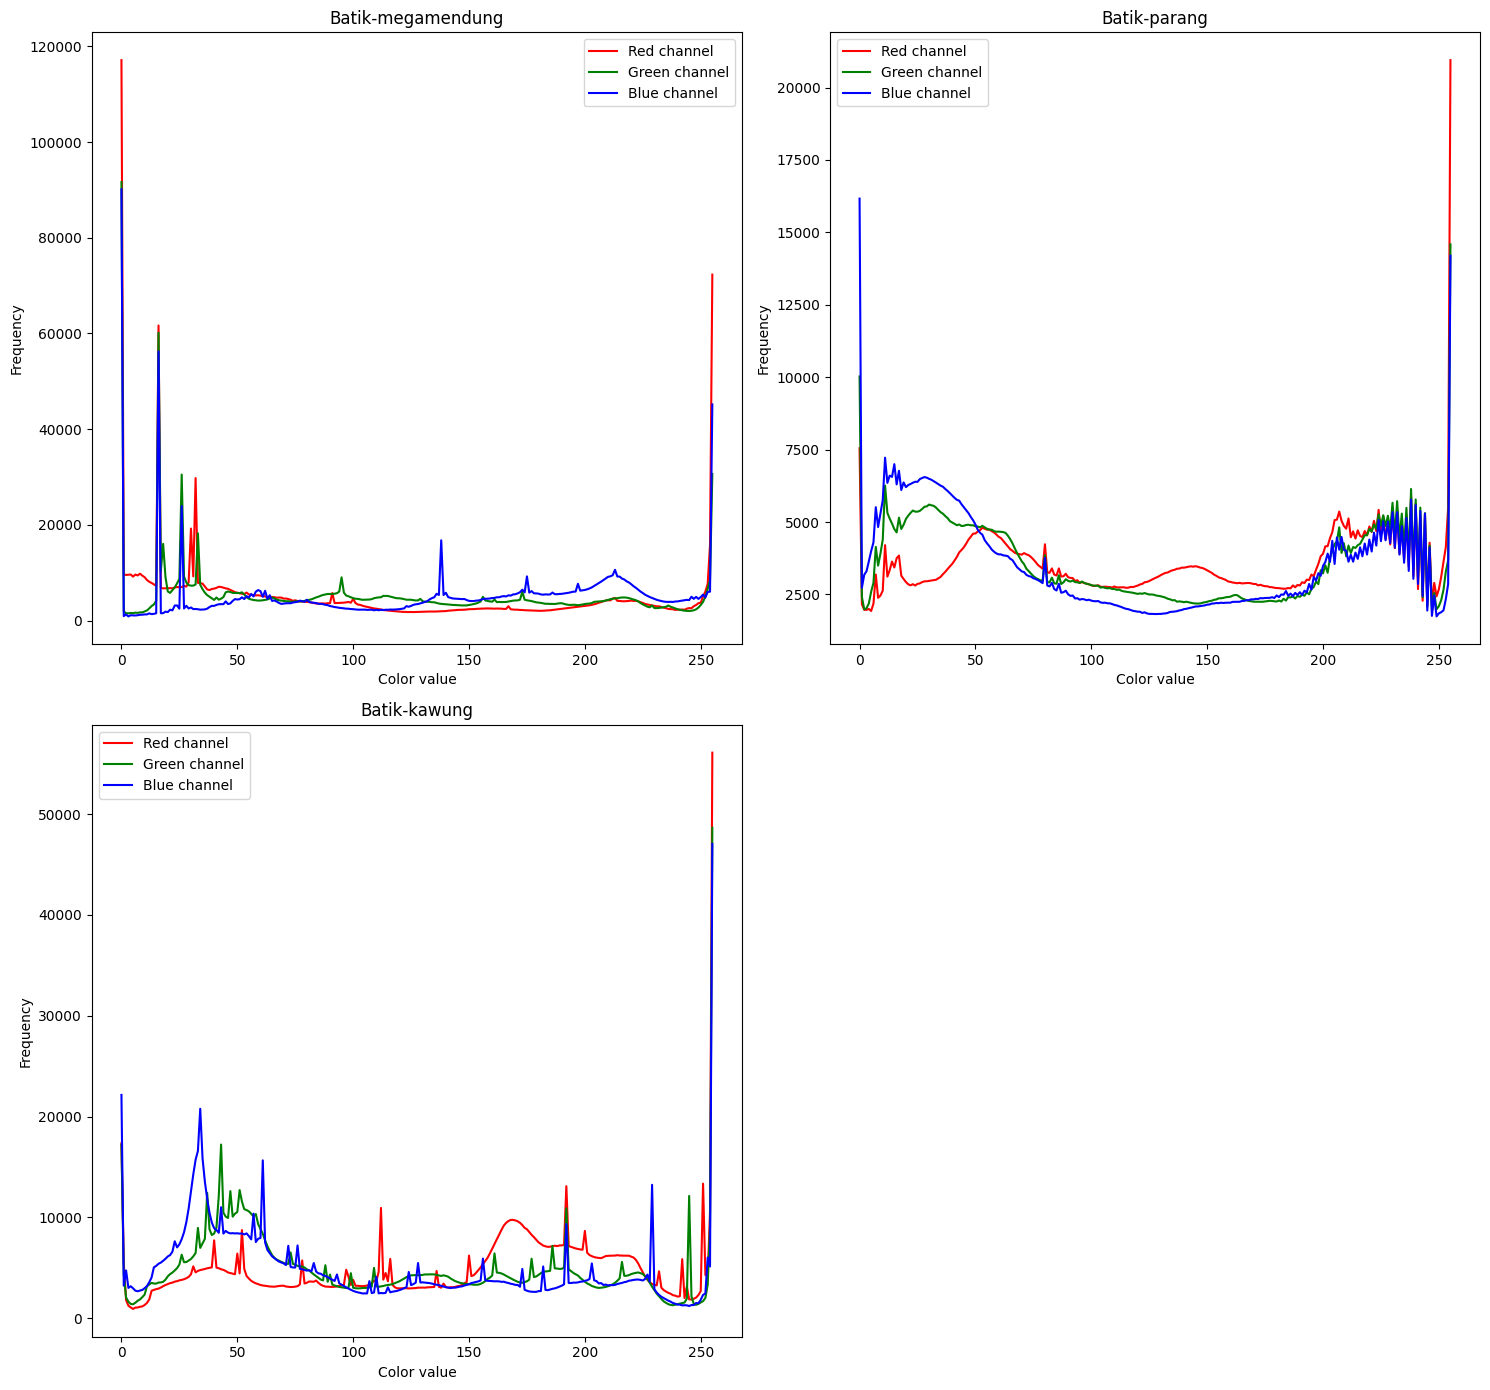

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = '/content/drive/MyDrive/Dataset'
classes = ['batik-megamendung', 'batik-parang', 'batik-kawung']

def plot_average_color_histogram(path, classes):
    colors = ('r', 'g', 'b')
    channel_labels = ('Red', 'Green', 'Blue')
    channel_ids = (0, 1, 2)

    num_plots = len(classes)
    num_cols = min(num_plots, 2)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 7*num_rows))

    for i, fruit in enumerate(classes):
        image_files = [os.path.join(path, fruit, file) for file in os.listdir(os.path.join(path, fruit))]
        histograms = []

        for img_path in image_files:
            img = Image.open(img_path)
            img_array = np.array(img)
            if len(img_array.shape) == 3:
                hist_channels = [np.histogram(img_array[:, :, i], bins=256, range=(0, 256))[0]
                      for i in channel_ids]
            elif len(img_array.shape) == 2:
                hist_channels = [np.histogram(img_array, bins=256, range=(0, 256))[0]] * 3
            else:
                print("Unsupported image format:", img_path)
                continue

            histograms.append(hist_channels)

        mean_histograms = np.mean(histograms, axis=0)

        row = i // num_cols
        col = i % num_cols

        for j, (hist, color, label) in enumerate(zip(mean_histograms, colors, channel_labels)):
            ax = axes[row, col]
            ax.plot(range(256), hist, color=color, label=f'{label} channel')
            ax.set_title(f'{fruit.capitalize()}')
            ax.set_xlabel('Color value')
            ax.set_ylabel('Frequency')
            ax.legend()

    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    plt.tight_layout()
    plt.show()

plot_average_color_histogram(path, classes)


In [ ]:
batik = []

for item in batik_types:

 all_batik = os.listdir('/content/drive/MyDrive/Dataset' + '/' +item)

 for batiks in all_batik:
    batik.append((item, str('/content/drive/MyDrive/Dataset' + '/' +item) + '/' + batiks))

In [ ]:
batik_df = pd.DataFrame(data=batik, columns=['batik type', 'image'])
print(batik_df.head())

     batik type                                              image
0  batik-kawung  /content/drive/MyDrive/Dataset/batik-kawung/15...
1  batik-kawung  /content/drive/MyDrive/Dataset/batik-kawung/17...
2  batik-kawung  /content/drive/MyDrive/Dataset/batik-kawung/1.jpg
3  batik-kawung  /content/drive/MyDrive/Dataset/batik-kawung/13...
4  batik-kawung  /content/drive/MyDrive/Dataset/batik-kawung/12...


In [ ]:
print("Total number of batik in the dataset: ", len(batik_df))

batik_count = batik_df['batik type'].value_counts()

print("fruit in each category: ")
print(batik_count)

Total number of batik in the dataset:  141
fruit in each category: 
batik type
batik-parang         50
batik-megamendung    46
batik-kawung         45
Name: count, dtype: int64


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_samples(path, class_names, num_samples=5):
    fig, axs = plt.subplots(len(class_names), num_samples, figsize=(15, 3 * len(class_names)))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(path, class_name)
        files = os.listdir(class_path)
        selected_samples = random.sample(files, num_samples)

        for j, sample in enumerate(selected_samples):
            sample_path = os.path.join(class_path, sample)
            img = mpimg.imread(sample_path)
            img_shape = img.shape
            axs[i, j].imshow(img)
            axs[i, j].set_title(f'{sample}\n{img_shape[1]}x{img_shape[0]}', fontsize=10)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

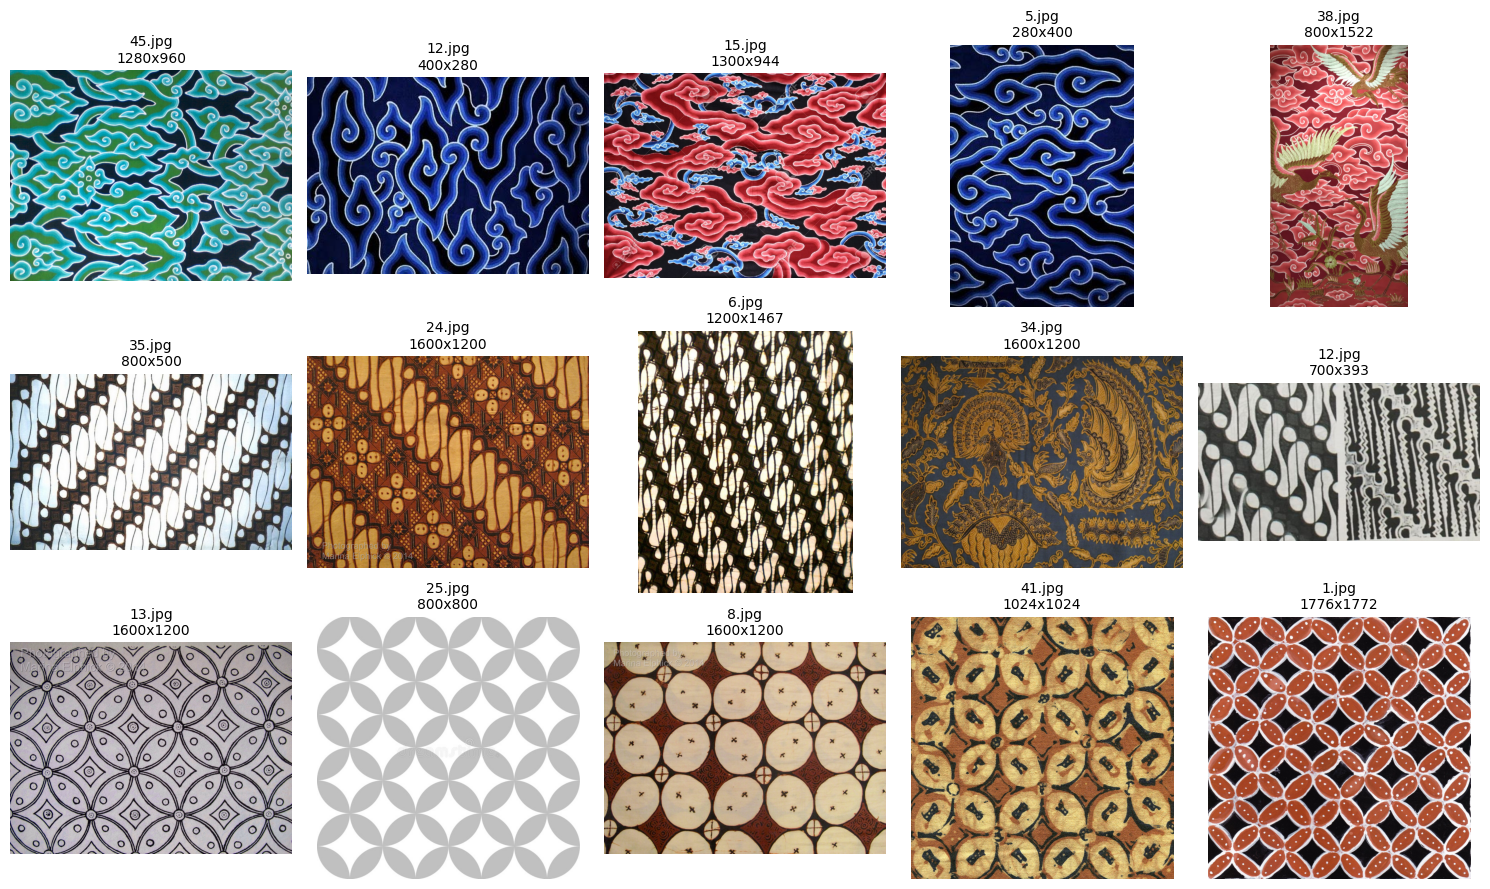

In [ ]:
display_random_samples('/content/drive/MyDrive/Dataset', ['batik-megamendung', 'batik-parang', 'batik-kawung'])

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_samples(path, class_names, num_samples):
    class_path = os.path.join(path, class_names)
    files = os.listdir(class_path)

    selected_samples = random.sample(files, num_samples)

    fig, axs = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, sample in enumerate(selected_samples):
        sample_path = os.path.join(class_path, sample)
        img = mpimg.imread(sample_path)
        axs[i].imshow(img)
        axs[i].set_title(sample)
        axs[i].axis('off')

    fig.suptitle(f'{class_names.upper()}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

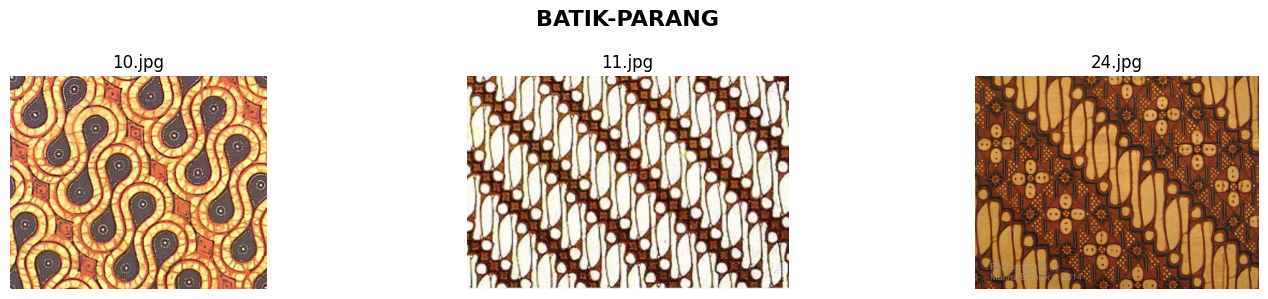

In [ ]:
display_samples(path, 'batik-parang', 3)

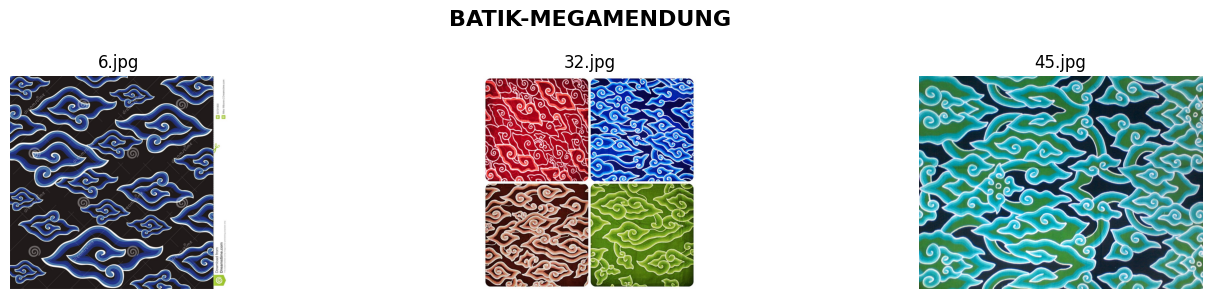

In [ ]:
display_samples(path, 'batik-megamendung', 3)

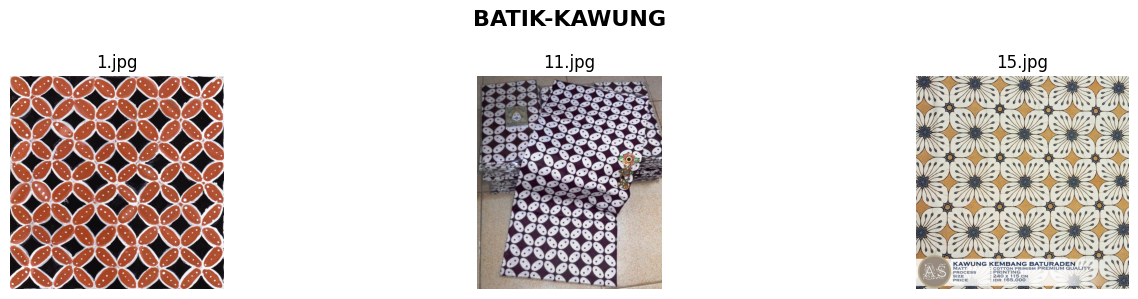

In [ ]:
display_samples(path, 'batik-kawung', 3)

## Data Preprocessing

In [ ]:
import cv2
import os
import numpy as np

path = '/content/drive/MyDrive/Dataset/'

class_names = os.listdir(path)
num_classes = len(class_names)

img_size = (224, 224, 3)

images = []
labels = []

for each_class in class_names:
    for image_file in os.listdir(os.path.join(path, each_class)):
        image_path = os.path.join(path, each_class, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image is not None:
            image = cv2.resize(image, (img_size[1], img_size[0]))
            images.append(image)
            label = np.zeros(num_classes)
            label[class_names.index(each_class)] = 1
            labels.append(label)
        else:
            print("Could not read image:", image_path)

images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Could not read image: /content/drive/MyDrive/Dataset/batik-parang/47.jpg
Images shape: (140, 224, 224, 3)
Labels shape: (140, 3)


In [ ]:
labels_array = np.asarray(labels)
images_array = np.asarray(images)

print("Labels Shape : ", labels_array.shape)
print("Images Shape : ", images_array.shape)

Labels Shape :  (140, 3)
Images Shape :  (140, 224, 224, 3)


In [ ]:
images_array = images_array.astype('float32') / 255
images_array.shape

(140, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(images_array, labels_array, test_size = 0.1, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.1 * len(images_array) / len(x_train), random_state = 42)

len(x_train), len(x_test), len(x_valid)

(112, 14, 14)

In [ ]:
print(y_train.shape)

(112, 3)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

#Modelling

##Scratch

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    #ayers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.3),

    layers.Flatten(),

    layers.Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    #layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')
])

In [ ]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(x_valid, y_valid),
                    )

Epoch 1/50
4/4 [==============================] - 3s 295ms/step - loss: 37.0398 - accuracy: 0.3482 - val_loss: 32.3093 - val_accuracy: 0.3571
Epoch 2/50
4/4 [==============================] - 1s 361ms/step - loss: 20.9266 - accuracy: 0.3839 - val_loss: 11.1970 - val_accuracy: 0.6429
Epoch 3/50
4/4 [==============================] - 1s 301ms/step - loss: 10.7153 - accuracy: 0.4732 - val_loss: 9.2550 - val_accuracy: 0.3571
Epoch 4/50
4/4 [==============================] - 2s 461ms/step - loss: 8.5423 - accuracy: 0.4821 - val_loss: 7.5846 - val_accuracy: 0.5714
Epoch 5/50
4/4 [==============================] - 2s 535ms/step - loss: 7.4058 - accuracy: 0.4821 - val_loss: 7.0211 - val_accuracy: 0.3571
Epoch 6/50
4/4 [==============================] - 1s 359ms/step - loss: 6.6385 - accuracy: 0.4375 - val_loss: 6.2820 - val_accuracy: 0.2857
Epoch 7/50
4/4 [==============================] - 1s 300ms/step - loss: 5.9402 - accuracy: 0.4643 - val_loss: 5.5229 - val_accuracy: 0.4286
Epoch 8/50
4/4 

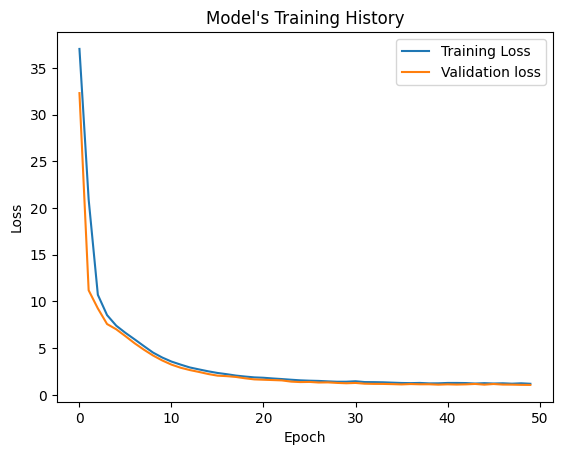

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label = 'Training Loss')
plt.plot(val_loss, label = 'Validation loss')
plt.title('Model\'s Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 [==============================] - 0s 37ms/step - loss: 1.0895 - accuracy: 0.8571
Test loss: 1.0895017385482788, Test accuracy: 0.8571428656578064


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 64ms/step


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_multilabel = lb.fit_transform(y_test)
y_pred_multilabel = lb.transform(y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_multilabel, y_pred_multilabel, target_names = ['Parang','Megamendung','Kawung']))

              precision    recall  f1-score   support

      Parang       0.50      0.50      0.50         2
 Megamendung       0.86      1.00      0.92         6
      Kawung       1.00      0.83      0.91         6

   micro avg       0.86      0.86      0.86        14
   macro avg       0.79      0.78      0.78        14
weighted avg       0.87      0.86      0.86        14
 samples avg       0.86      0.86      0.86        14



### Transfer Learning

In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import layers

base_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    dropout_rate=0.2,
    classifier_activation='softmax',
    include_preprocessing=True,
    pooling='max'
)

In [ ]:
for layer in base_model.layers[:]:
    layer.trainable = False

In [ ]:
input = layers.Input(shape=(224,224,3))
x = base_model(input, training=False)
x = layers.Dropout(0.3)(x)
predictions = layers.Dense(3, activation='softmax')(x)

model_tl = tf.keras.Model(input, outputs=predictions)

In [ ]:
model_tl.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    mode='min',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=15,
    min_lr=0.0001,
    mode='min',
    verbose=1
)

callbacks = [checkpoint, early_stopping, reduce_lr]


In [ ]:
history = model_tl.fit(
    x_train, y_train,
    epochs=50,
    validation_data=(x_valid, y_valid),
    callbacks = callbacks
)

Epoch 1/50
3/4 [=====================>........] - ETA: 0s - loss: 17.1219 - accuracy: 0.3750
Epoch 1: val_loss improved from inf to 9.58687, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 6s 529ms/step - loss: 18.2891 - accuracy: 0.3661 - val_loss: 9.5869 - val_accuracy: 0.3571 - lr: 0.1000
Epoch 2/50
3/4 [=====================>........] - ETA: 0s - loss: 11.1833 - accuracy: 0.3646
Epoch 2: val_loss did not improve from 9.58687
4/4 [==============================] - 0s 72ms/step - loss: 13.0205 - accuracy: 0.3839 - val_loss: 18.0898 - val_accuracy: 0.3571 - lr: 0.1000
Epoch 3/50
3/4 [=====================>........] - ETA: 0s - loss: 15.1299 - accuracy: 0.3750
Epoch 3: val_loss improved from 9.58687 to 5.46887, saving model to best_model.h5
4/4 [==============================] - 0s 140ms/step - loss: 14.1380 - accuracy: 0.3839 - val_loss: 5.4689 - val_accuracy: 0.5000 - lr: 0.1000
Epoch 4/50
3/4 [=====================>........] - ETA: 0s - loss: 4.2242 - accuracy: 0.4792
Epoch 4: val_loss did not improve from 5.46887
4/4 [==============================] - 0s 55ms/step - loss: 4.9937 - accuracy: 0.4643 - val_loss: 8.0394 - val_accura

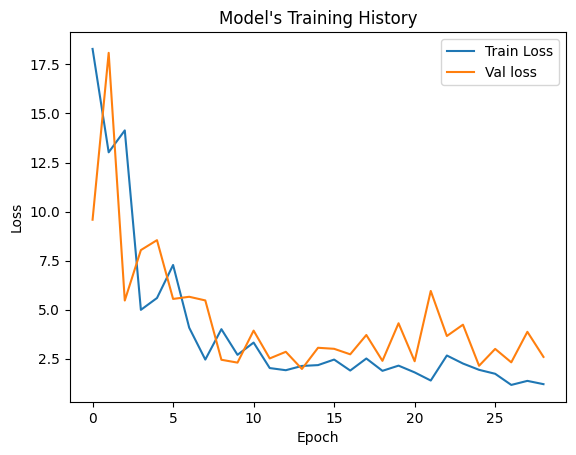

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label = 'Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.title('Model\'s Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model_tl.evaluate(x_test,y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 [==============================] - 0s 66ms/step - loss: 0.6714 - accuracy: 0.8571
Test loss: 0.6713630557060242, Test accuracy: 0.8571428656578064


In [ ]:
y_pred_tl = model_tl.predict(x_test)
y_pred_tl = np.argmax(y_pred_tl, axis=1)

1/1 [==============================] - 1s 1s/step


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_multilabel_tl = lb.fit_transform(y_test)
y_pred_multilabel_tl = lb.transform(y_pred_tl)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_multilabel_tl, y_pred_multilabel_tl, target_names = ['Parang','Megamendung','Kawung']))

              precision    recall  f1-score   support

      Parang       0.00      0.00      0.00         2
 Megamendung       0.86      1.00      0.92         6
      Kawung       0.86      1.00      0.92         6

   micro avg       0.86      0.86      0.86        14
   macro avg       0.57      0.67      0.62        14
weighted avg       0.73      0.86      0.79        14
 samples avg       0.86      0.86      0.86        14



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
